In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation import *

In [2]:
n=5
A=get_xinmeng_like_matrix(n,seed=9894).T
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5()

Training Progress: 100%|██████████| 100/100 [00:19<00:00,  5.19it/s, accuracy=44.2600000000%, epoch=100, loss=1.9295746326]


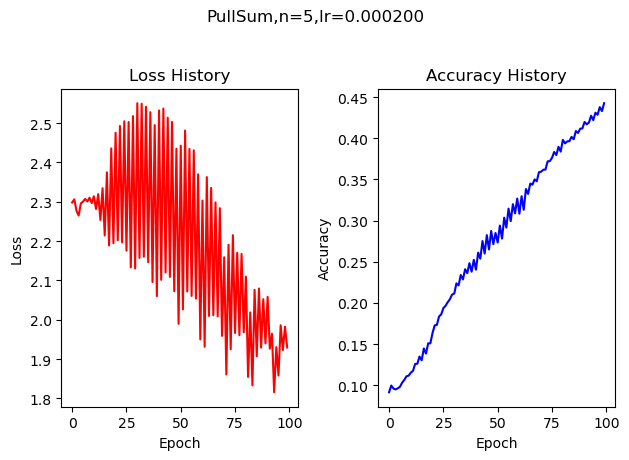

In [19]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_4layer,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=100,lr=(2e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

In [15]:
class MNISTClassifier_4layer(nn.Module):
    def __init__(self):
        super(MNISTClassifier_4layer, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 10)
        
        # Dropout layers
        self.dropout1 = nn.Dropout(p=0.5)
        self.dropout2 = nn.Dropout(p=0.5)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        nn.init.kaiming_normal_(self.fc1.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc2.weight, nonlinearity='leaky_relu')
        nn.init.kaiming_normal_(self.fc3.weight, nonlinearity='leaky_relu')
        nn.init.xavier_normal_(self.fc4.weight)
        # Bias initialization
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.constant_(self.fc2.bias, 0)
        nn.init.constant_(self.fc3.bias, 0)
        nn.init.constant_(self.fc4.bias, 0)

    def forward(self, x):
        x = F.silu(self.bn1(self.fc1(x)))  # 使用 Swish 激活函数
        x = self.dropout1(x)  # 添加 Dropout
        x = F.silu(self.bn2(self.fc2(x)))  # 使用 Swish 激活函数
        x = self.dropout2(x)  # 添加 Dropout
        x = F.silu(self.bn3(self.fc3(x)))  # 使用 Swish 激活函数
        x = self.fc4(x)
        return x

In [14]:
l2,a2=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_4layer,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=200,lr=(5e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress:   5%|▌         | 10/200 [00:03<01:09,  2.73it/s, accuracy=13.0800000000%, epoch=10, loss=nan]                       


KeyboardInterrupt: 

Training Progress: 100%|██████████| 150/150 [00:26<00:00,  5.60it/s, accuracy=26.2000000000%, epoch=150, loss=2.1263665676]


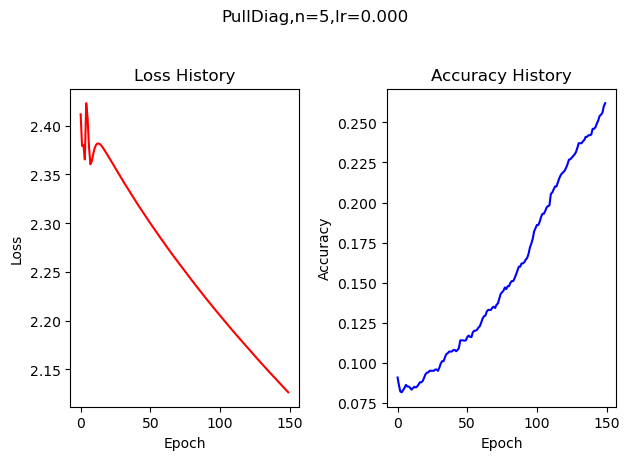

In [13]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_4layer,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=150,lr=(5e-5/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)